<a href="https://colab.research.google.com/github/Larissacavalcantes/Larissacavalcantes/blob/main/Detec%C3%A7%C3%A3o%20de%20doen%C3%A7as%20card%C3%ADacas%20em%20est%C3%A1gios%20iniciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as srn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
data = pd.read_csv('cardio_train.csv', sep = ";")

In [7]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
data.shape

(70000, 13)

In [9]:
data.columns = ['Id', 'Age', 'Gender', 'Height', 'Weight', 'Systolic blood pressure',
                 'Diastolic blood pressure', 'Cholesterol', 'Gluc', 'Smoke', 'Alco', 
                 'Active','Cardio']

In [10]:
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
print(data.dtypes)

Id                            int64
Age                           int64
Gender                        int64
Height                        int64
Weight                      float64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Cholesterol                   int64
Gluc                          int64
Smoke                         int64
Alco                          int64
Active                        int64
Cardio                        int64
dtype: object


In [12]:
#convertendo a idade de dias para anos
data['Age'] = data['Age']//365
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#convertendo a Altura de cm para metro
data['Height'] = data['Height']/100
data.head()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

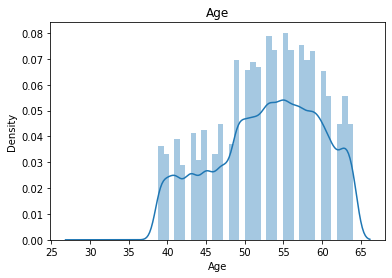

In [14]:
srn.distplot(data['Age']).set_title('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height')

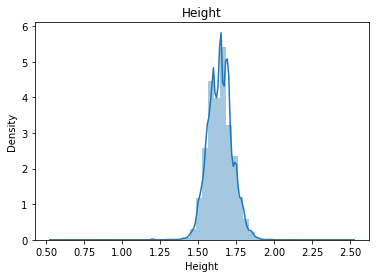

In [15]:

srn.distplot(data['Height']).set_title('Height')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight')

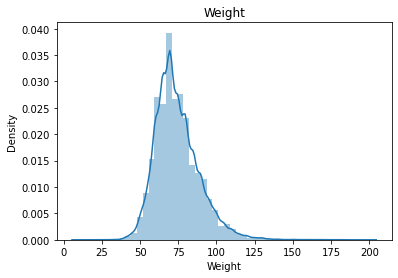

In [16]:
#kg
srn.distplot(data['Weight']).set_title('Weight')

In [17]:
data.isnull().sum()

Id                          0
Age                         0
Gender                      0
Height                      0
Weight                      0
Systolic blood pressure     0
Diastolic blood pressure    0
Cholesterol                 0
Gluc                        0
Smoke                       0
Alco                        0
Active                      0
Cardio                      0
dtype: int64

In [18]:
data[data.duplicated(['Id'],keep=False)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


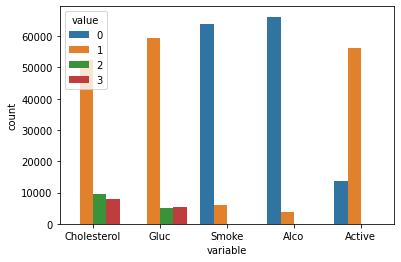

In [19]:
data_categorical = data.loc[:,['Cholesterol','Gluc', 'Smoke', 'Alco', 'Active']]
srn.countplot(x="variable", hue="value",data= pd.melt(data_categorical));

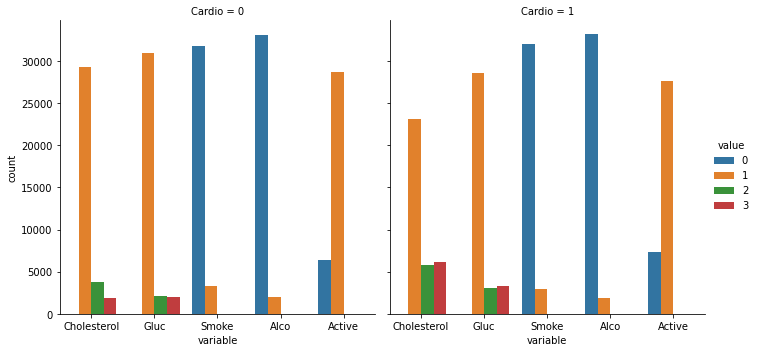

In [20]:
data_long = pd.melt(data, id_vars=['Cardio'], value_vars=['Cholesterol','Gluc', 'Smoke', 'Alco', 'Active'])
srn.catplot(x="variable", hue="value", col="Cardio",
                data=data_long, kind="count");

In [21]:
data.groupby('Gender')['Height'].mean()

Gender
1    1.613556
2    1.699479
Name: Height, dtype: float64

In [22]:
data['Gender'].value_counts()

1    45530
2    24470
Name: Gender, dtype: int64

In [23]:
data.groupby('Gender')['Alco'].sum()

Gender
1    1161
2    2603
Name: Alco, dtype: int64

In [24]:
data['Cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: Cardio, dtype: float64

In [25]:
pd.crosstab(data['Cardio'],data['Gender'],normalize=True)

Gender,1,2
Cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [26]:
data.describe()

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data.loc[(data['Height']<1.40)|(data['Height']>2.2)]



,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
224,309,59,2,0.76,55.0,120,80,1,1,0,0,1,0
2412,3399,61,2,1.38,52.0,140,100,1,1,0,0,1,1
2944,4150,53,1,1.34,52.0,120,70,1,1,0,0,0,0
3208,4523,50,1,1.36,57.0,120,80,1,1,0,0,1,0
3420,4838,39,1,1.00,70.0,100,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66479,94906,46,2,1.10,90.0,110,90,1,1,0,0,1,0
66643,95141,51,1,0.57,61.0,130,90,1,1,0,0,1,1
67866,96921,59,1,1.33,123.0,180,100,2,1,0,0,1,1
69052,98630,55,2,1.20,80.0,140,90,1,2,0,0,1,1


In [28]:
mediana = sts.median(data['Height'])
mediana

1.65

In [29]:
data.loc[(data['Height']<1.4)|(data['Height']>2.2),'Height']=mediana

In [30]:
data.loc[(data['Height']<1.40)|(data['Height']>2.2)]


,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


In [31]:
data['Height'].describe()

count    70000.000000
mean         1.644656
std          0.078053
min          1.400000
25%          1.590000
50%          1.650000
75%          1.700000
max          2.070000
Name: Height, dtype: float64

In [32]:
data.loc[(data['Weight']<55)|(data['Weight']>140)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
17,27,45,1,1.58,52.0,110,70,1,3,0,0,1,0
23,33,64,2,1.56,45.0,110,60,1,1,0,0,1,0
44,59,54,1,1.54,50.0,170,80,3,1,0,0,1,1
69,94,57,1,1.57,53.0,110,70,1,1,0,0,0,1
80,109,45,1,1.59,49.0,120,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69912,99861,43,1,1.55,48.0,90,70,1,1,0,0,1,0
69919,99871,47,1,1.59,45.0,110,70,2,2,0,0,1,0
69937,99908,39,1,1.60,53.0,90,60,1,1,0,0,1,0
69961,99948,45,1,1.61,50.0,110,75,1,1,0,0,1,0


In [33]:
mediana = sts.median(data['Weight'])
mediana

72.0

In [34]:
data.loc[(data['Weight']<55)|(data['Weight']>140),'Weight']=mediana
data.loc[(data['Weight']<55)|(data['Weight']>140)]

,Id,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Gluc,Smoke,Alco,Active,Cardio


In [37]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['Diastolic blood pressure']> data['Systolic blood pressure']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [38]:
data.drop(data[(data['Systolic blood pressure'] > data['Systolic blood pressure'].quantile(0.975)) | (data['Systolic blood pressure'] < data['Systolic blood pressure'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['Diastolic blood pressure'] > data['Diastolic blood pressure'].quantile(0.975)) | (data['Diastolic blood pressure'] < data['Diastolic blood pressure'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


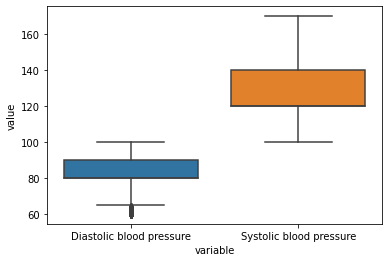

In [41]:
blood_pressure = data.loc[:,['Diastolic blood pressure','Systolic blood pressure']]
srn.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['Diastolic blood pressure']> data['Systolic blood pressure']].shape[0]))

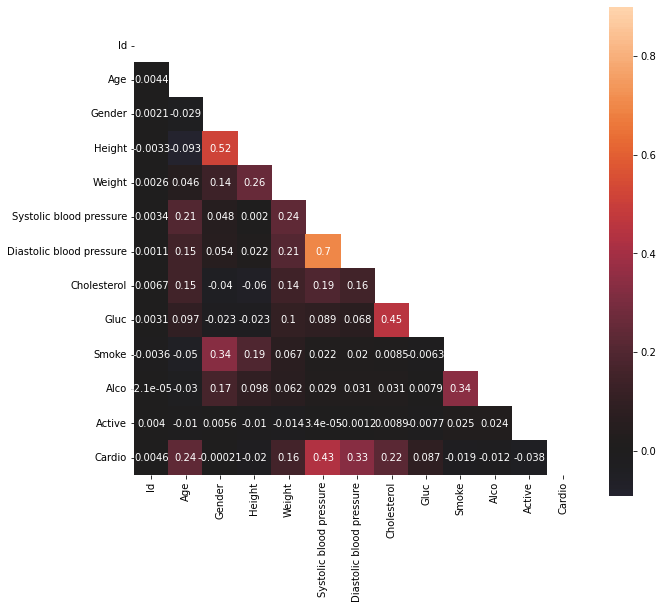

In [92]:
correlation = data.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 9))
plot = srn.heatmap(correlation, mask = mask, vmax=.9, center = 0, annot = True, square = True)
    

In [104]:
x = data.iloc[:,0:12].values
y = data.iloc[:,12].values


In [105]:
x_train, x_test, y_train, y_test = train_test_split(predict,target,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [121]:
dtc = DecisionTreeClassifier().fit(x_train,y_train)

In [122]:
predict = dtc.predict(x_test)
predict

array([0, 1, 1, ..., 0, 1, 0])

In [123]:
confusion = confusion_matrix(y_test, predict)
confusion

array([[6393, 3738],
       [3698, 6029]])

In [124]:
taxa_acerto = accuracy_score(y_test, predict)
taxa_acerto

0.6255413435391278